<a href="https://www.kaggle.com/code/iqmansingh/company-employee-baseline?scriptVersionId=136691632" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<img src="https://raw.githubusercontent.com/IqmanS/Machine-Learning-Notebooks/main/company_employee_baseline/banner.jpg">

# **Company-Employee Dataset Baseline**
---

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd 
import os
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore")
pd.plotting.register_matplotlib_converters()
%matplotlib inline
sns.set_style("dark")

print("Setup Complete")

Setup Complete


# Importing Dataset

In [2]:
emp_path = "/kaggle/input/company-employee-dataset/company_employee_details.csv"
emp_data = pd.read_csv(emp_path)

In [3]:
emp_data.head()

,Unnamed: 0,company,department,employee_id,age,age_when_joined,years_in_the_company,salary,annual_bonus,prior_years_experience,full_time,part_time,contractor
0,0,Glasses,BigData,16,41,38,3,68074.971354,17664.104103,3,0.000000,0.000000,1.000000
1,1,Glasses,AI,56,44,42,2,49092.147458,21551.141079,2,0.000000,0.184991,1.000000
2,2,Cheerper,Support,59,41,40,1,40000.000000,23698.878851,2,0.000000,0.919887,0.662706
3,3,Glasses,Design,40,39,32,7,108192.465506,21570.929657,1,0.930396,0.546206,0.000000
4,4,Glasses,Search Engine,47,30,22,9,71291.191132,21565.505715,2,0.525432,0.938412,0.000000


# Data Cleaning

In [4]:
emp_data.drop(["Unnamed: 0"],inplace=True,axis=1)

In [5]:
emp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   company                 5000 non-null   object 
 1   department              5000 non-null   object 
 2   employee_id             5000 non-null   int64  
 3   age                     5000 non-null   int64  
 4   age_when_joined         5000 non-null   int64  
 5   years_in_the_company    5000 non-null   int64  
 6   salary                  5000 non-null   float64
 7   annual_bonus            5000 non-null   float64
 8   prior_years_experience  5000 non-null   int64  
 9   full_time               5000 non-null   float64
 10  part_time               5000 non-null   float64
 11  contractor              5000 non-null   float64
dtypes: float64(5), int64(5), object(2)
memory usage: 468.9+ KB


In [6]:
catDataCols = ["company","department"]

for i in catDataCols:
    print(f"Values of {i} are :",emp_data[i].unique())

Values of company are : ['Glasses' 'Cheerper' 'Pear']
Values of department are : ['BigData' 'AI' 'Support' 'Design' 'Search Engine' 'Sales']


In [7]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for i in catDataCols:
    emp_data[i] = encoder.fit_transform(emp_data[i])

In [8]:
emp_data.head()

,company,department,employee_id,age,age_when_joined,years_in_the_company,salary,annual_bonus,prior_years_experience,full_time,part_time,contractor
0,1,1,16,41,38,3,68074.971354,17664.104103,3,0.000000,0.000000,1.000000
1,1,0,56,44,42,2,49092.147458,21551.141079,2,0.000000,0.184991,1.000000
2,0,5,59,41,40,1,40000.000000,23698.878851,2,0.000000,0.919887,0.662706
3,1,2,40,39,32,7,108192.465506,21570.929657,1,0.930396,0.546206,0.000000
4,1,4,47,30,22,9,71291.191132,21565.505715,2,0.525432,0.938412,0.000000


# Exploratory Data Analysis

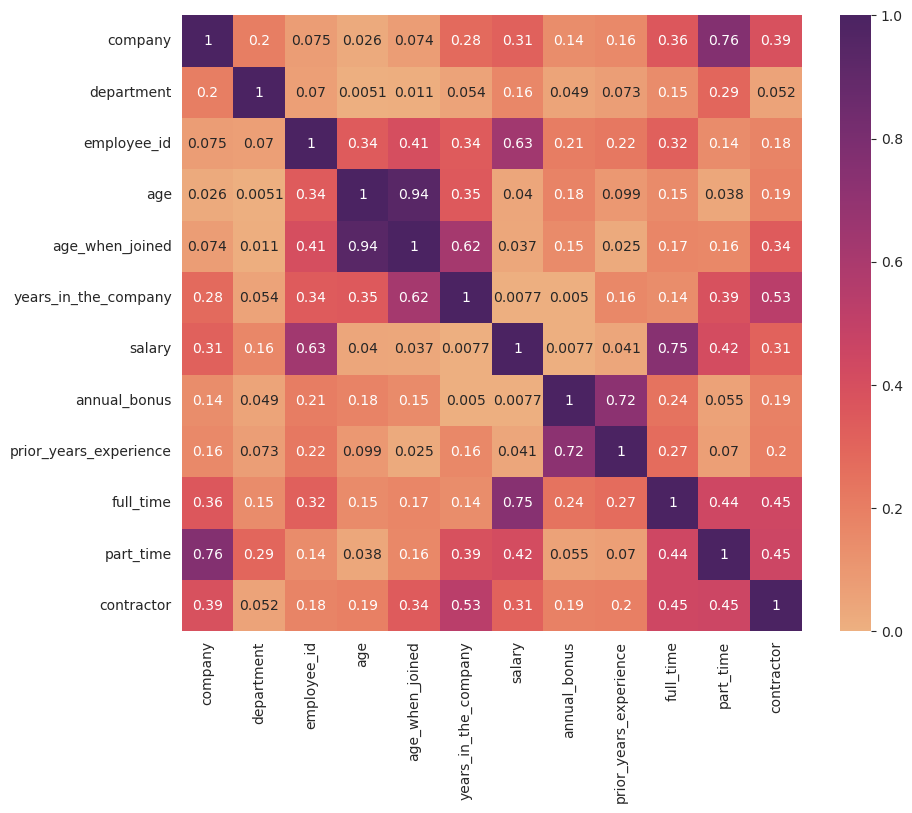

In [9]:
features = [i for i in emp_data.columns]
corr = emp_data[features].corr(numeric_only=False)
plt.figure(figsize = (10,8))
sns.heatmap(corr.abs(), cmap = 'flare', annot = True,vmin=0);
plt.show()

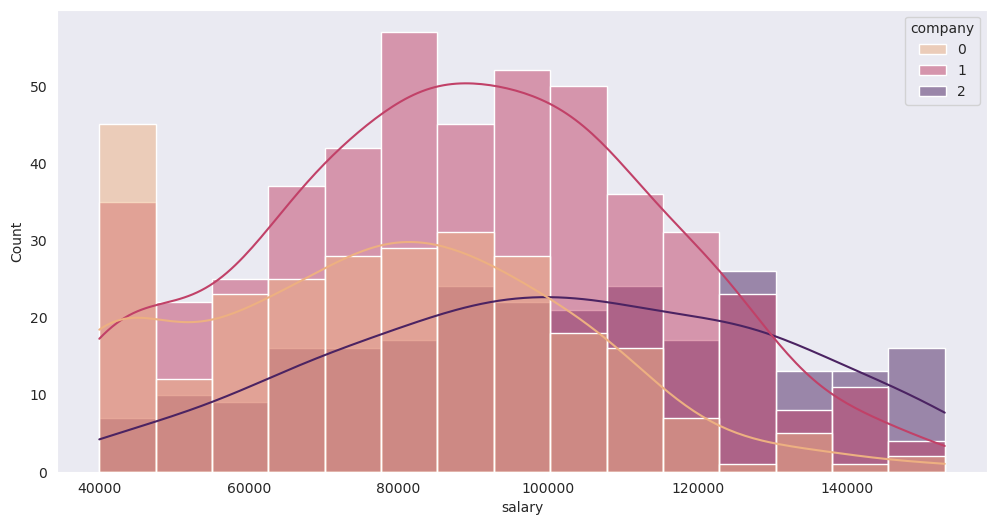

In [10]:
plt.figure(figsize=(12,6))
sns.histplot(data=emp_data.sample(1000),x="salary",hue="company",palette="flare",kde=True);

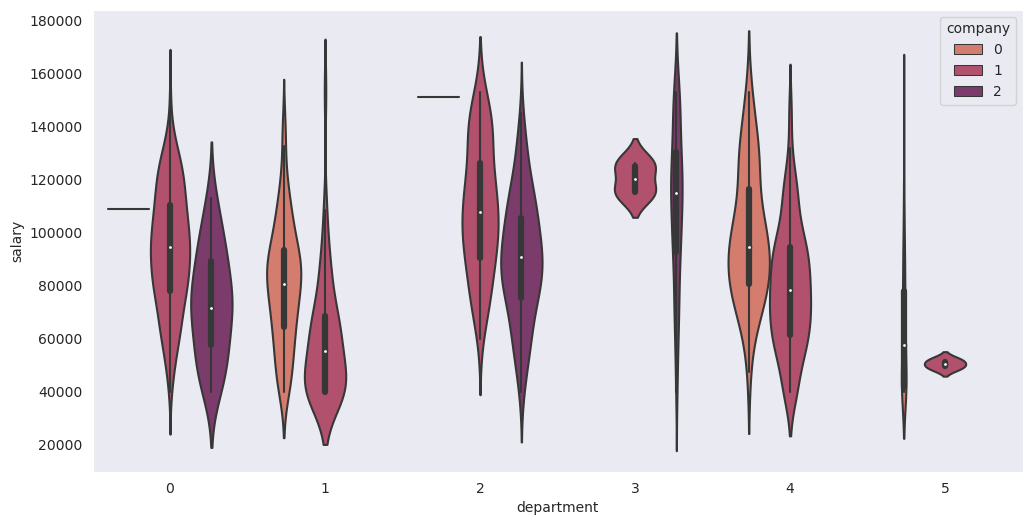

In [11]:
plt.figure(figsize=(12,6))
sns.violinplot(data=emp_data.sample(1000),y="salary",x="department",hue="company",palette="flare");

# Training Models

In [12]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [23]:
cols = [i for i in emp_data.columns if i!="salary"]
X=emp_data[cols]
y=emp_data.salary

In [24]:
seed = np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=seed)

In [25]:
rfmodel = RandomForestRegressor()
rfmodel.fit(X_train,y_train)

RandomForestRegressor()

In [26]:
xgbmodel = XGBRegressor()
xgbmodel.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [27]:
lgbmmodel = LGBMRegressor()
lgbmmodel.fit(X_train,y_train)

LGBMRegressor()

# Testing Models

In [28]:
from sklearn.metrics import mean_absolute_error
print("MAE of RF:",mean_absolute_error(y_test,rfmodel.predict(X_test)))
print("MAE of XGB:",mean_absolute_error(y_test,xgbmodel.predict(X_test)))      
print("MAE of LGBM:",mean_absolute_error(y_test,lgbmmodel.predict(X_test)))      

MAE of RF: 7229.541750559579
MAE of XGB: 6858.958157050423
MAE of LGBM: 6232.239368354323
